Você pode rodar este notebook localmente ou no Colab. Para abrir diretamente no Colab, basta clicar no botão abaixo.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pablo-sampaio/rl_facil/blob/main/cap01_novo/cap01-main.ipynb)

# Capítulo 1 - Bandidos Multibraços (Multi-Armed Bandits)

Neste notebook, apresentamos resultados de testes (mais simples e mais elaborados) envolvendo os principais algoritmos para este problema.

Para melhor entender os algoritmos, é recomendado acessar os scripts da pasta `cap01` onde os códigos foram definidos.

## Configurações Iniciais

Para instalar e importar pacotes e configurar algumas coisas...

In [ ]:
from IPython.display import clear_output
import sys

if 'google.colab' in sys.modules:
    !pip install gymnasium
    # clone repository, to use "util" module
    !git clone https://github.com/pablo-sampaio/rl_facil
    sys.path.append("/content/rl_facil")
    clear_output()
else:
    from os import path
    sys.path.append( path.dirname( path.dirname( path.abspath("__main__") ) ) )

: 

In [ ]:
from util.bandit_envs import MultiArmedBanditEnv, GaussianMultiArmedBanditEnv
from util.experiments import repeated_exec
from util.plot import plot_multiple_results

## 1 - Testando os ambientes

Existem dois ambientes, no modulo **`util.bandit_envs`**. Ambos recebem uma ação representada como um número inteiro a partir de 0 e retorna uma recompensa numérica `float`.
- **MultiArmedBanditEnv**:
  - retorna recompensas 0 ou 1, de acordo com a ação
  - cada ação tem uma probabilidade distinta passada no construtor (e desconhecida dos algoritmos).
- **GaussianMultiArmedBanditEnv**:
    - retorna recompensas com distribuição normal (gaussiana), cujos valores são contínuos e ocorrem com maior probabilidade perto da média
    - cada ação tem uma média distinta passada no construtor (e desconhecida dos algoritmos).

Em cada ambiente, vamos testar aplicar a sequência de ações abaixo, que apenas alterna ciclicamente as ações **0**, **1** e **2**.

In [ ]:
STEPS = 15
action_list = [ 0, 1, 2 ] * (STEPS//3)
action_list

[0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]

In [ ]:
env1 = MultiArmedBanditEnv([0.01, 0.80, 0.20])

env1.reset()
for i in range(STEPS):
    a = action_list[i]
    r = env1.step(a)
    print(" - ação", a, ", recompensa", r)

 - ação 0 , recompensa 0.0
 - ação 1 , recompensa 0.0
 - ação 2 , recompensa 0.0
 - ação 0 , recompensa 0.0
 - ação 1 , recompensa 1.0
 - ação 2 , recompensa 0.0
 - ação 0 , recompensa 0.0
 - ação 1 , recompensa 1.0
 - ação 2 , recompensa 0.0
 - ação 0 , recompensa 0.0
 - ação 1 , recompensa 1.0
 - ação 2 , recompensa 0.0
 - ação 0 , recompensa 0.0
 - ação 1 , recompensa 0.0
 - ação 2 , recompensa 0.0


In [ ]:
env2 = GaussianMultiArmedBanditEnv([0.01, 5.0, 1.0])

env2.reset()
for i in range(STEPS):
    a = action_list[i]
    r = env2.step(a)
    print(" - ação", a, ", recompensa", r)

 - ação 0 , recompensa 0.3097204732594171
 - ação 1 , recompensa 4.714271241290939
 - ação 2 , recompensa 0.5382535534154334
 - ação 0 , recompensa 1.5665187030214163
 - ação 1 , recompensa 4.099141383483621
 - ação 2 , recompensa 1.7297379149098102
 - ação 0 , recompensa -0.8013526086926324
 - ação 1 , recompensa 6.715444842965768
 - ação 2 , recompensa 0.22649289456599053
 - ação 0 , recompensa 1.6986395861320809
 - ação 1 , recompensa 4.627411237669113
 - ação 2 , recompensa -0.7216204136102164
 - ação 0 , recompensa 0.034073387973818
 - ação 1 , recompensa 5.348547113647987
 - ação 2 , recompensa 2.5044869369529


## 2 - Soluções Baseline


In [ ]:
from cap01_novo.baseline_algorithms import run_greedy, run_random

Abaixo, vamos testar duas soluções simples usadas como base para comparação (ou seja, soluções de *baseline*):
- **greedy**: depois de fazer 1 vez cada ação, escolhe a melhor e repete para sempre
- **random**: escolher qualquer ação aleatoriamente

Vamos apresentar testes no ambiente abaixo, com três ações de probabilidades 20%, 50% e 75% de retornar recompensa.



In [ ]:
               # Ações:   0    1    2
BANDITS_PROBABILITIES = [0.2, 0.5, 0.75]
env = MultiArmedBanditEnv(BANDITS_PROBABILITIES)

***Qual dos dois algoritmos você acha que vai se sair melhor?***

Abaixo, testamos os dois algoritmos rodando por 10 mil passos. Execute mais de uma vez a célula e veja como o resultado varia.

In [ ]:
rewards, _ = run_greedy(env, total_steps=10000)
print("Greedy - soma de recompensas:", sum(rewards))

rewards, _ = run_random(env, total_steps=10000)
print("Random - soma de recompensas:", sum(rewards))

Greedy - soma de recompensas: 7489.0
Random - soma de recompensas: 4880.0


Depois de fazer alguns testes, você deve perceber que um deles varia muito nos resultados. A seguir, vamos fazer experimentos executando ambos várias vezes e plotamos a recompensa média recebida até cada passo.

In [ ]:
RUNS  = 50
STEPS = 10000

result_random = repeated_exec(RUNS, "RANDOM", run_random, env, STEPS)
result_greedy = repeated_exec(RUNS, "GREEDY", run_greedy, env, STEPS)

Executing <function run_random at 0x7c27f9045e10>:


100%|██████████| 50/50 [00:09<00:00,  5.35it/s]


  (50 executions of RANDOM finished in 9.36 secs)
Executing <function run_greedy at 0x7c27f9045d80>:


100%|██████████| 50/50 [00:00<00:00, 113.13it/s]

  (50 executions of GREEDY finished in 0.45 secs)


In [ ]:
for (alg_name, rewards) in [result_greedy, result_random]:
    print()
    print("Summary for " + alg_name)
    print(" - total reward:", rewards.sum())
    print(" - avg reward (win rate):", rewards.sum() / STEPS)


Summary for GREEDY
 - total reward: 241548.0
 - avg reward (win rate): 24.1548

Summary for RANDOM
 - total reward: 241686.0
 - avg reward (win rate): 24.1686


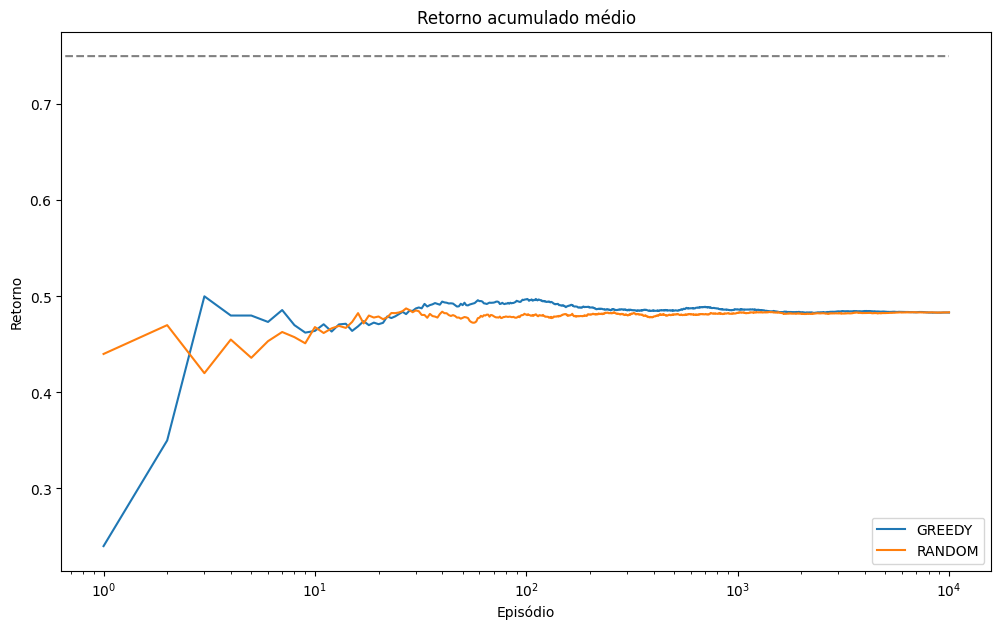

In [ ]:
plot_multiple_results([result_greedy, result_random], cumulative=True, x_log_scale=True, yreference=env.get_max_mean_reward())

O resultado acima deve mostrar resultados próximos, no longo prazo. Porém, um deles:
- tende a ser levemente melhor,
- porém apresenta maior variação.

Abaixo, mostramos os gráficos individualizados de cada algoritmo, junto com uma área sombreada que mostra 1 desvio padrão da média para cima e para baixo. Assim, a área sombreada dá uma ideia de quanto variam os resultados entre as várias execuções.

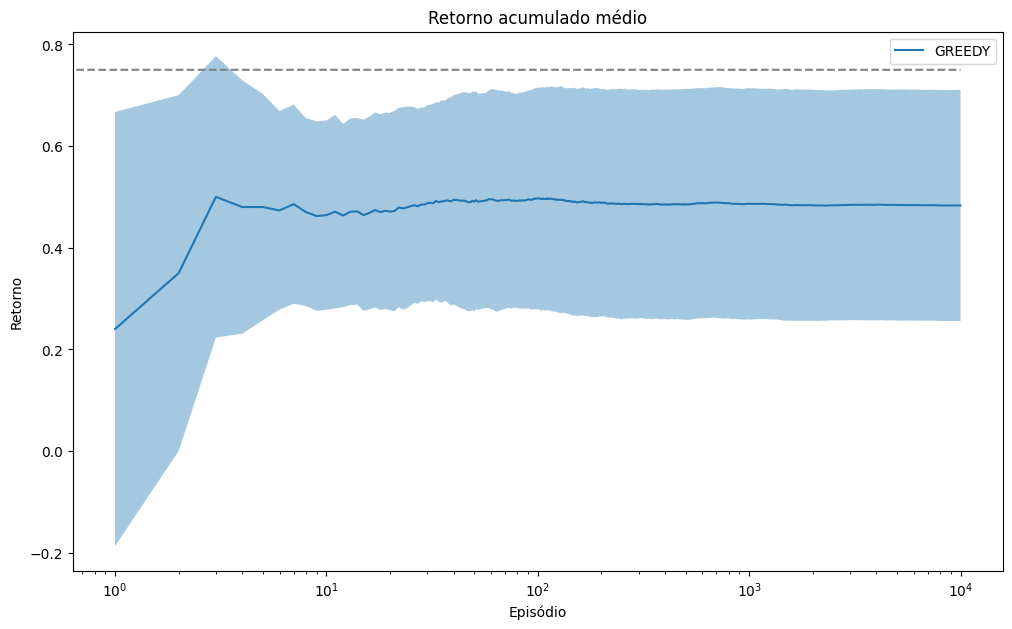

In [ ]:
plot_multiple_results([result_greedy], cumulative=True, x_log_scale=True, yreference=env.get_max_mean_reward(), plot_stddev=True)

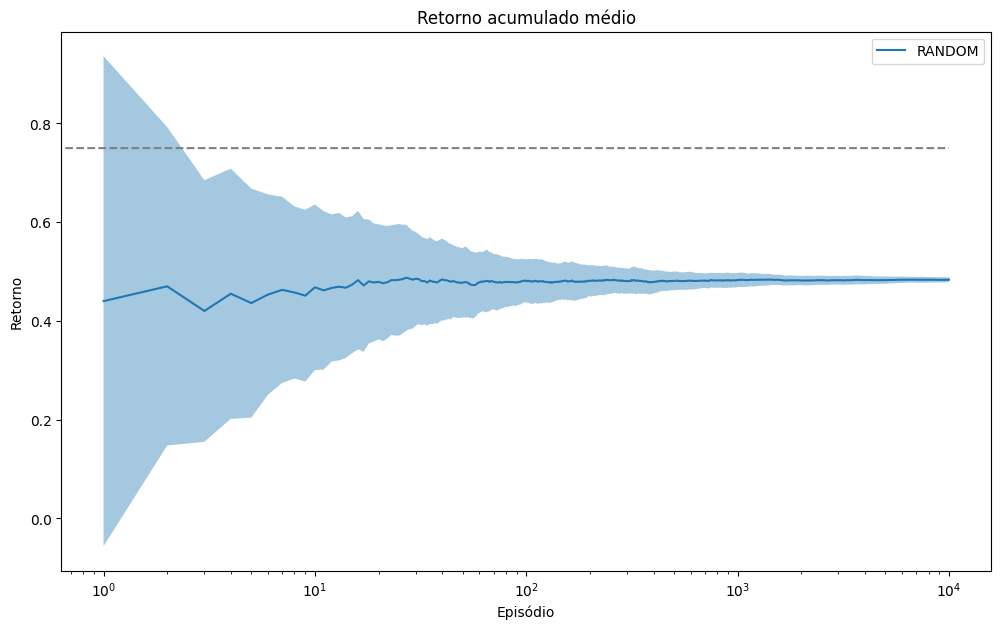

In [ ]:
plot_multiple_results([result_random], cumulative=True, x_log_scale=True, yreference=env.get_max_mean_reward(), plot_stddev=True)

## 3 - Epsilon-Greedy

In [48]:
from cap01_novo.epsilon_greedy import run_epsilon_greedy
from cap01_novo.epsilon_greedy_otimista import run_epsilon_greedy_otimista
from cap01_novo.epsilon_greedy_decrescente import run_epsilon_greedy_decrescente
from cap01_novo.epsilon_greedy_limitado_decre import run_epsilon_greedy_limitado_decrescente

Nesta solução, um parâmetro **`epsilon`** controla o grau de exploração (*exploration*) do algoritmo, que escolhe ações assim:
- com probabilidade *epsilon*: faz uma ação qualquer
- com probabilidade *(1.0-epsilon)*: faz a ação de melhor média (até o momento)

Vamos fazer alguns experimentos, com diferentes valores de *epsilon*.

In [39]:
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]
env = MultiArmedBanditEnv(BANDIT_PROBABILITIES)

rewards, _ = run_epsilon_greedy(env, total_steps=10000, epsilon=0.2)
print(f"Eps-greedy otimista com epsilon=0.2 - soma de recompensas:", sum(rewards))

rewards, _ = run_epsilon_greedy(env, total_steps=10000, epsilon=0.2)
print(f"Eps-greedy (0.2) - soma de recompensas:", sum(rewards))

rewards, _ = run_epsilon_greedy(env, total_steps=10000, epsilon=0.1)
print(f"Eps-greedy (0.1) - soma de recompensas:", sum(rewards))

rewards, _ = run_epsilon_greedy(env, total_steps=10000, epsilon=0.01)
print(f"Eps-greedy (0.01) - soma de recompensas:", sum(rewards))

Eps-greedy otimista com epsilon=0.2 - soma de recompensas: 6918.0
Eps-greedy (0.2) - soma de recompensas: 6995.0
Eps-greedy (0.1) - soma de recompensas: 7212.0
Eps-greedy (0.01) - soma de recompensas: 7433.0


A seguir, vamos comparações entre duas versões do *epsilon-greedy* e o *random*.

In [49]:
RUNS  = 50
STEPS = 10000

results = []
results.append( repeated_exec(RUNS, "RANDOM", run_random, env, STEPS) )
results.append( repeated_exec(RUNS, "epsilon_decres", run_epsilon_greedy_decrescente, env, STEPS) )
results.append( repeated_exec(RUNS, "epsilon_decres_limitado", run_epsilon_greedy_limitado_decrescente, env, STEPS) )
results.append( repeated_exec(RUNS, "Otimista_eps = 0.2", run_epsilon_greedy_otimista, env, STEPS, 0.20) )


for epsilon in [0.20, 0.10]:
    results.append( repeated_exec(RUNS, f"EPS({epsilon})-GREEDY", run_epsilon_greedy, env, STEPS, epsilon) )

for (alg_name, rewards) in results:
    print()
    print("Summary for " + alg_name)
    print(" - total reward:", rewards.sum())
    print(" - avg reward (win rate):", rewards.sum() / STEPS)

Executing <function run_random at 0x7c27f9045e10>:


100%|██████████| 50/50 [00:08<00:00,  5.58it/s]


  (50 executions of RANDOM finished in 8.97 secs)
Executing <function run_epsilon_greedy_decrescente at 0x7c27f8540dc0>:


100%|██████████| 50/50 [00:04<00:00, 11.23it/s]


  (50 executions of epsilon_decres finished in 4.46 secs)
Executing <function run_epsilon_greedy_limitado_decrescente at 0x7c27f8344700>:


100%|██████████| 50/50 [00:04<00:00, 10.64it/s]


  (50 executions of epsilon_decres_limitado finished in 4.71 secs)
Executing <function run_epsilon_greedy_otimista at 0x7c27f8096c20>:


100%|██████████| 50/50 [00:04<00:00, 10.57it/s]


  (50 executions of Otimista_eps = 0.2 finished in 4.74 secs)
Executing <function run_epsilon_greedy at 0x7c27f85c3e20>:


100%|██████████| 50/50 [00:03<00:00, 13.08it/s]


  (50 executions of EPS(0.2)-GREEDY finished in 3.83 secs)
Executing <function run_epsilon_greedy at 0x7c27f85c3e20>:


100%|██████████| 50/50 [00:03<00:00, 12.64it/s]

  (50 executions of EPS(0.1)-GREEDY finished in 3.96 secs)

Summary for RANDOM
 - total reward: 242040.0
 - avg reward (win rate): 24.204

Summary for epsilon_decres
 - total reward: 355651.0
 - avg reward (win rate): 35.5651

Summary for epsilon_decres_limitado
 - total reward: 370099.0
 - avg reward (win rate): 37.0099

Summary for Otimista_eps = 0.2
 - total reward: 348090.0
 - avg reward (win rate): 34.809

Summary for EPS(0.2)-GREEDY
 - total reward: 348103.0
 - avg reward (win rate): 34.8103

Summary for EPS(0.1)-GREEDY
 - total reward: 360877.0
 - avg reward (win rate): 36.0877


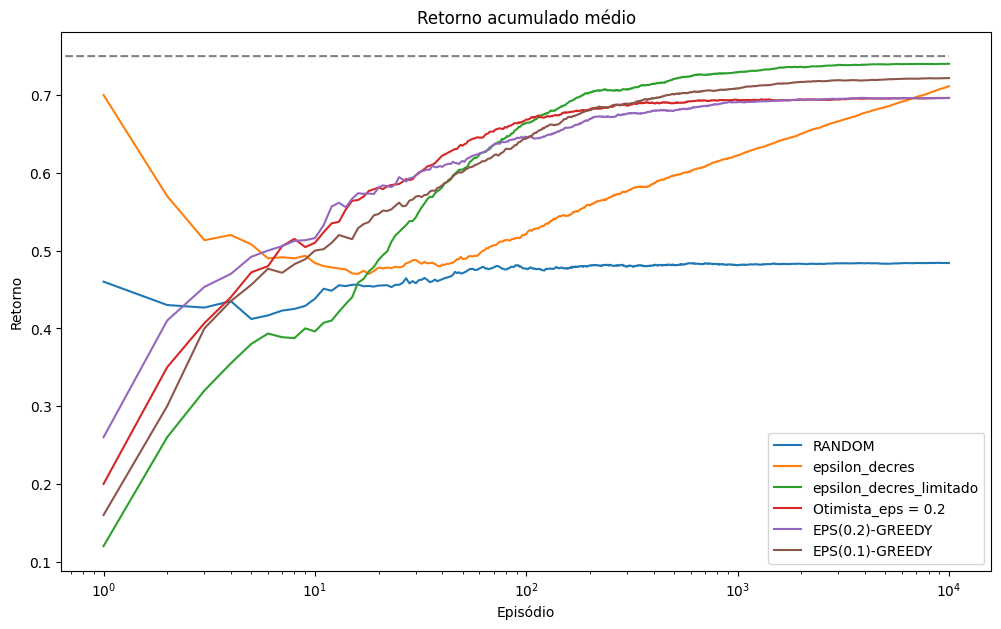

In [50]:
plot_multiple_results(results, cumulative=True, x_log_scale=True, yreference=env.get_max_mean_reward())

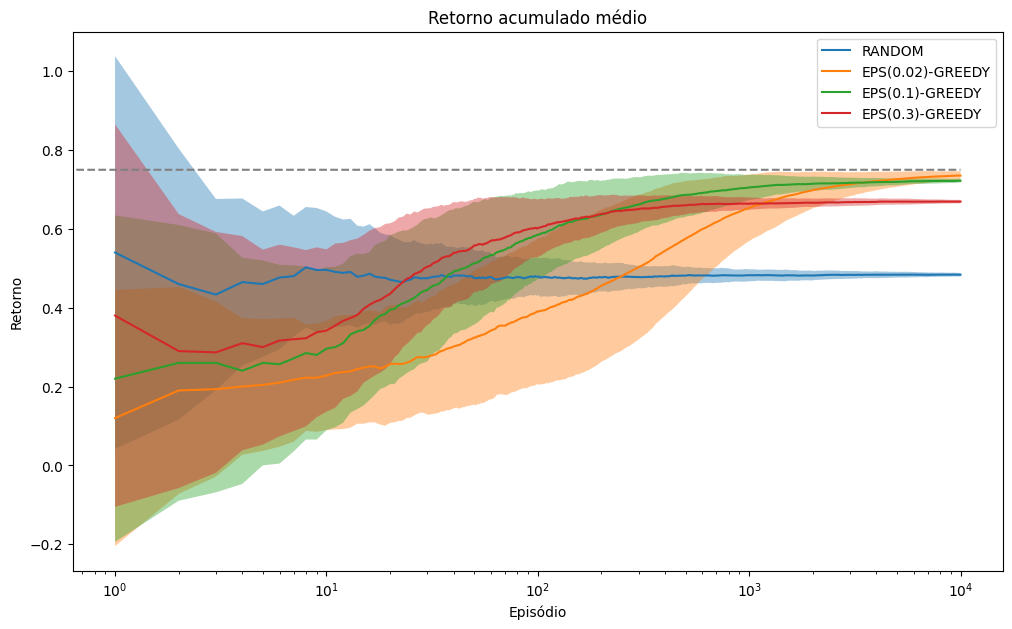

In [ ]:
plot_multiple_results(results, cumulative=True, x_log_scale=True, yreference=env.get_max_mean_reward(), plot_stddev=True)

Uma deficiência do **epsilon-greedy** padrão é que ele *sempre* vai explorar, e sempre na mesma proporção (dada pelo *epsilon*).

Uma solução melhor consiste em fazer o epsilon diminuir com o tempo.




## 4 - Decaying Epsilon-Greedy

Nesta variante do *epsilon-greedy*, o epsilon decai ao longo do tempo.

Não daremos a implementação pronta do **decaying epsilon-greedy**. Mas, aqui, discutimos como fazer o decaimento do valor do epsilon.

Uma ideia para o decaimento é fazer o valor de epsilon se comportar assim:
- inicia com um valor inicial *`initial_epsilon`*, que pode ser sempre `1.0` (ou seja, inicia com 100% de exploração)
- cai até um valor mínimo dado pelo parâmetro *`minimum_epsilon`*
- esse valor mínimo é atingido no passo dado pelo parâmetro *`target_step`*

Esse decaimento pode ser feito de forma *linear* ou *exponencial* (mas existem outros). Abaixo, mostramos como o valor do epsilon varia nos dois esquemas citados para `minimun_epsilon=0.01` e `target_step=7000`.

In [ ]:
import matplotlib.pyplot as plt
from cap01_novo.decaying_schemes import exponential_decay, linear_decay

mininimum_epsilon = 0.01
target_step = 7000
step_sequence = range(1, 10000 + 1)

for label, decay_scheme in [("exponential", exponential_decay), ("linear", linear_decay)]:
    get_epsilon_fn = decay_scheme(mininimum_epsilon, target_step)
    plt.plot(step_sequence, [get_epsilon_fn(t) for t in step_sequence], label=label)

plt.legend()


Note que tanto `exponential_decay()` como `linear_decay()` retornam funções. A função retornada recebe o passo atual e retorna o valor correspondente desejado (para *epsilon*). Veja o arquivo `decaying_schemes.py` para entender melhor.

Agora é com você: implemente o **decaying epsilon-greedy** simplesmente integrando alguma dessas formas de decaimento (ou ambas) ao código do epsilon-greedy.

In [ ]:
# faça aqui
def run_decaying_epsilon_greedy():
  pass


## 5 - UCB

In [ ]:
from cap01_novo.ucb import run_ucb

O **UCB** usa uma única fórmula para avaliar cada possível ação. A fórmula tem dois termos:
1. O **Q** da ação, que é a estimativa da recompensa média. Serve como termo de "exploitação".
1. E um termo que mede a *incerteza* de **Q** em relação ao valor real da média. Serve como fator de exploração.
  - A incerteza é baixa para ações escolhidas "muitas" vezes, pois o valor de **Q** provavelmente está próximo da média real.
  - E é alta para ações escolhidas relativamente "poucas" vezes, pois o valor de **Q** tem mais chance de estar impreciso.

O UCB escolhe sempre a ação que dê a melhor soma dos dois termos acima.

Um parâmetro **c** controla o peso do termo de incerteza. O valor padrão é `c=2.0`.

Abaixo, testamos o UCB com diferentes valores do `c`.

In [ ]:
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]
env = MultiArmedBanditEnv(BANDIT_PROBABILITIES)
#env = GaussianMultiArmedBanditEnv(BANDIT_PROBABILITIES)

rewards, _ = run_ucb(env, 10000, c=2.0)
print(f"UCB(c=2.0) - soma de recompensas:", sum(rewards))

rewards, _ = run_ucb(env, 10000, c=1.0)
print(f"UCB(c=1.0) - soma de recompensas:", sum(rewards))

rewards, _ = run_ucb(env, 10000, c=0.5)
print(f"UCB(c=0.5) - soma de recompensas:", sum(rewards))

rewards, _ = run_random(env, total_steps=10000)
print("Random - soma de recompensas:", sum(rewards))

In [ ]:
RUNS  = 50
STEPS = 10000

results = []
results.append( repeated_exec(RUNS, "RANDOM", run_random, env, STEPS) )

for param_c in [0.5, 1.0, 2.0]:
  results.append( repeated_exec(RUNS, f"UCB(c={param_c})", run_ucb, env, STEPS, param_c) )

plot_multiple_results(results, cumulative=True, x_log_scale=True, yreference=env.get_max_mean_reward())

Vemos, no gráfico acima, que os valores menores de *c* tiveram melhor desempenho.

Abaixo, mostramos especificamente o gráfico do UCB com `c=0.5`.

In [ ]:
plot_multiple_results([results[1]], cumulative=True, x_log_scale=True, yreference=env.get_max_mean_reward(), plot_stddev=True)

## 6 - Comparação Geral

Vamos fazer experimentos comparando:
- **random** para servir de comparação, como solução "ruim"
- **epsilon-greedy** com o melhor valor de *epsilon* que encontramos antes
- **ucb** com o melhor valor de *c* que encontramos

Cada experimento vai executar (reiniciando) cada algoritmo 70 vezes. Cada execução terá 100 mil passos. (Fique à vontade se quiser alterar).

Faremos experimentos separados para as duas versões de ambiente, nas duas subseções a seguir.

In [ ]:
# parâmetros dos algoritmos
epsilon = 0.02
c = 0.5

# parâmetros que controlam a repetição e duração dos experimentos
RUNS  = 70
STEPS = 100_000

# para carregar automaticamente os resultados de simulações já executadas
auto_load = True

### 6.1 - Com Multi-Armed Bandit de recompensas binárias

Aqui, usamos o ambiente padrão, com probabilidades bem próximas, para tentar "confundir" os algoritmos no início de cada execução.

In [ ]:
BANDIT_PROBABILITIES = [0.4, 0.5, 0.55]
env = MultiArmedBanditEnv(BANDIT_PROBABILITIES)

In [ ]:
results = []

results.append( repeated_exec(RUNS, "RANDOM", run_random, env, STEPS, auto_load=auto_load) )
results.append( repeated_exec(RUNS, f"EPS({epsilon})-GREEDY", run_epsilon_greedy, env, STEPS, epsilon, auto_load=auto_load) )
results.append( repeated_exec(RUNS, f"UCB(c={c})", run_ucb, env, STEPS, c, auto_load=auto_load) )

plot_multiple_results(results, cumulative=True, x_log_scale=True, yreference=env.get_max_mean_reward())

In [ ]:
plot_multiple_results(results, cumulative=True, x_log_scale=True, yreference=env.get_max_mean_reward(), plot_stddev=True)

### 6.2 - Com Multi-Armed Bandit de recompensas gaussianas

Aqui, usamos o ambiente com recompensas gaussianas (distribuição normal), com médias bem próximas, para tentar "confundir" os algoritmos no início.

*Atenção: Talvez os valores de **c** e **epsilon** que definimos antes não sejam tão bons nesta versão, porque eles foram escolhidos com experimentos na versão padrão.*

In [ ]:
BANDIT_MEANS = [0.4, 0.5, 0.55]
env_gauss = GaussianMultiArmedBanditEnv(BANDIT_MEANS)

In [ ]:
results_gauss = []

results_gauss.append( repeated_exec(RUNS, "RANDOM", run_random, env_gauss, STEPS, auto_load=auto_load) )
results_gauss.append( repeated_exec(RUNS, f"EPS({epsilon})-GREEDY", run_epsilon_greedy, env_gauss, STEPS, epsilon, auto_load=auto_load) )
results_gauss.append( repeated_exec(RUNS, f"UCB(c={c})", run_ucb, env_gauss, STEPS, c, auto_load=auto_load) )

plot_multiple_results(results_gauss, cumulative=True, x_log_scale=True, yreference=env_gauss.get_max_mean_reward())

In [ ]:
plot_multiple_results(results_gauss, cumulative=True, x_log_scale=True, yreference=env_gauss.get_max_mean_reward(), plot_stddev=True)